In [ ]:
# 将打破第一个低点的波段的分笔画出来

%run KPainter.ipynb
%run SectionAnalyser.ipynb
%run Util.ipynb
%run ChanBiManager.ipynb


def is_stop_loss(chan_bi_df):
    up_chan_bi_df = chan_bi_df[chan_bi_df['turning_point']=='bottom']

    if(up_chan_bi_df.shape[0]>1):
        the_first_bottom = up_chan_bi_df.iloc[0]
        the_second_bottom = up_chan_bi_df.iloc[1]

        if(the_second_bottom['price']<the_first_bottom['price']):
            return True

    return False
            


def paint_break_the_first_bottom_sections(scale,short,mid):
    sectionAnalyser = SectionAnalyser(scale, short, mid)
    day_sections_df = sectionAnalyser.build_cross_resonate_on_week_and_day()
    day_sections_df =  day_sections_df[day_sections_df['d_ma_mid_dire']=='Up']

    good_count=0
    stop_loss_count=0
    
    first_top_count=0
    first_bottom_count=0
    for key,row in day_sections_df.iterrows():
        analyser = ChanBiManager().get_analyser(row['symbol'],level_day,short,mid)
        chan_bi_df = analyser.get_chan_bis_between(row['d_s_date'],row['d_e_date'])
        
        painter = KPainter()
        painter.draw_single_level_chan_bi(row['symbol'],level_day,row['d_s_date'],row['d_e_date'],short,mid)

        if(chan_bi_df.shape[0]>0):
            the_first_bi = chan_bi_df.iloc[0]
            
            if(the_first_bi['turning_point']=='top'):
                first_top_count += 1
            else:
                first_bottom_count += 1
            
            if(is_stop_loss(chan_bi_df)):
                stop_loss_count += 1
            else:
                good_count += 1
                    
        print(row['symbol']+' '+row['d_s_date']+'===>'+row['d_e_date']+' first_top_count:'+str(first_top_count) +' first_bottom_count:'+str(first_bottom_count))
        print(row['symbol']+' '+row['d_s_date']+'===>'+row['d_e_date']+' stop_loss_count:'+str(stop_loss_count) +' good_count:'+str(good_count))
        
short=30
mid=60
scale=20

paint_break_the_first_bottom_sections(scale,short,mid)



In [ ]:
# 将打破第一个低点的波段的分笔画出来

%run KPainter.ipynb
%run SectionAnalyser.ipynb
%run Util.ipynb
%run ChanBiManager.ipynb


def is_stop_loss(chan_bi_df):
    up_chan_bi_df = chan_bi_df[chan_bi_df['turning_point']=='bottom']

    if(up_chan_bi_df.shape[0]>1):
        the_first_bottom = up_chan_bi_df.iloc[0]
        the_second_bottom = up_chan_bi_df.iloc[1]

        if(the_second_bottom['price']<the_first_bottom['price']):
            return True

    return False
            


def paint_break_the_first_bottom_sections(scale,short,mid):
    sectionAnalyser = SectionAnalyser(scale, short, mid)
    day_sections_df = sectionAnalyser.build_cross_resonate_on_week_and_day()
    day_sections_df =  day_sections_df[day_sections_df['d_ma_mid_dire']=='Up']

    good_count=0
    stop_loss_count=0
    
    first_top_count=0
    first_bottom_count=0
    
    stop_loss_df = pd.DataFrame(columns=['symbol','start_date','end_date','first_direc','break_bottom'])
    for key,row in day_sections_df.iterrows():
        analyser = ChanBiManager().get_analyser(row['symbol'],level_day,short,mid)
        chan_bi_df = analyser.get_chan_bis_between(row['d_s_date'],row['d_e_date'])
        
        if(chan_bi_df.shape[0]>0):
            the_first_bi = chan_bi_df.iloc[0]

            break_bottom = is_stop_loss(chan_bi_df)
            stop_loss_df.loc[stop_loss_df.shape[0]+1] = [row['symbol'],row['d_s_date'],row['d_e_date'],the_first_bi['turning_point'],break_bottom]
                    
    print(row['symbol']+' '+row['d_s_date']+'===>'+row['d_e_date']+' first_top_count:'+str(first_top_count) +' first_bottom_count:'+str(first_bottom_count))
    print(row['symbol']+' '+row['d_s_date']+'===>'+row['d_e_date']+' stop_loss_count:'+str(stop_loss_count) +' good_count:'+str(good_count))
    return stop_loss_df
        
short=30
mid=60
scale=300

stop_loss_df = paint_break_the_first_bottom_sections(scale,short,mid)

stop_loss_df

load SZ#000001 sections from file
section_df shape 39


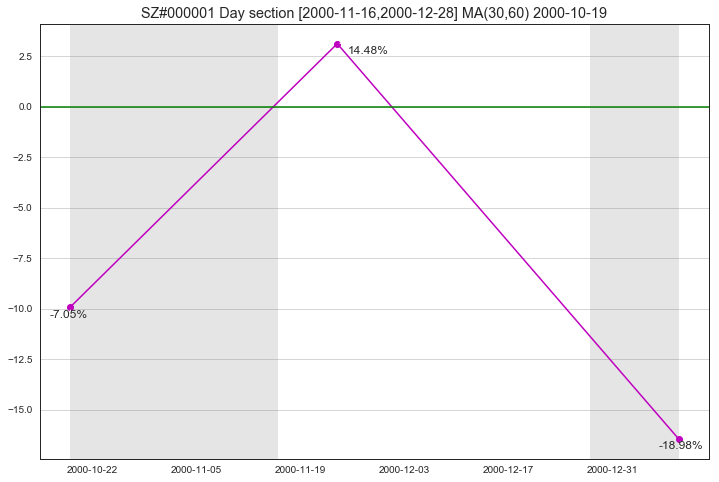

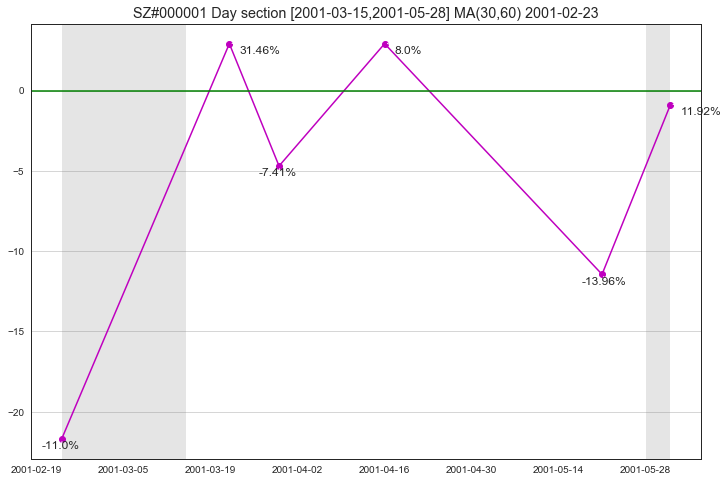

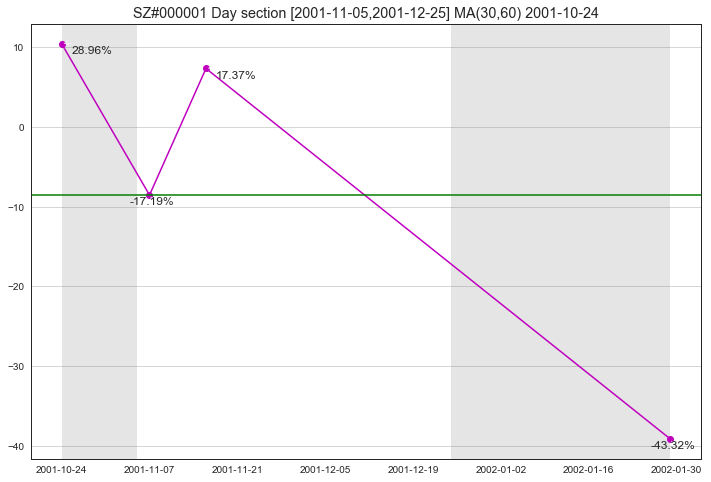

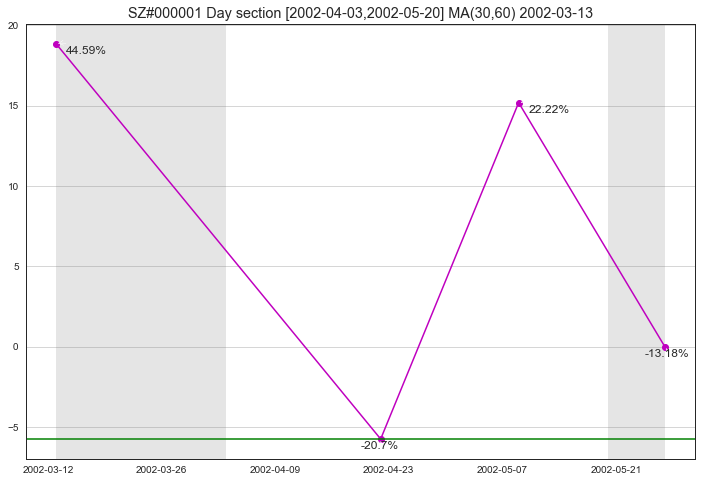

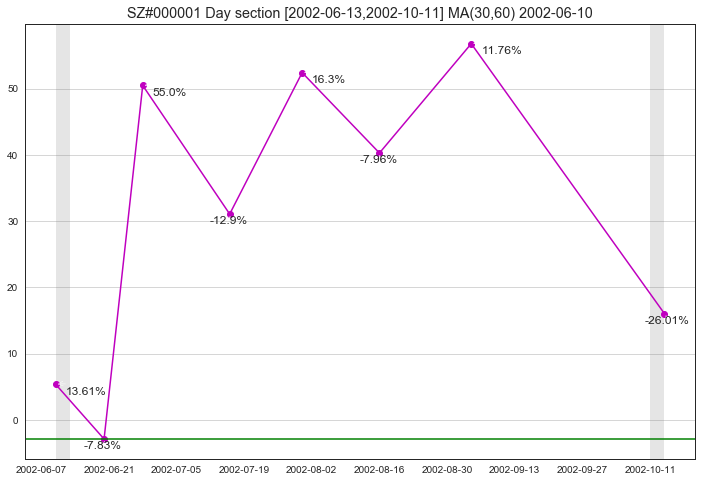

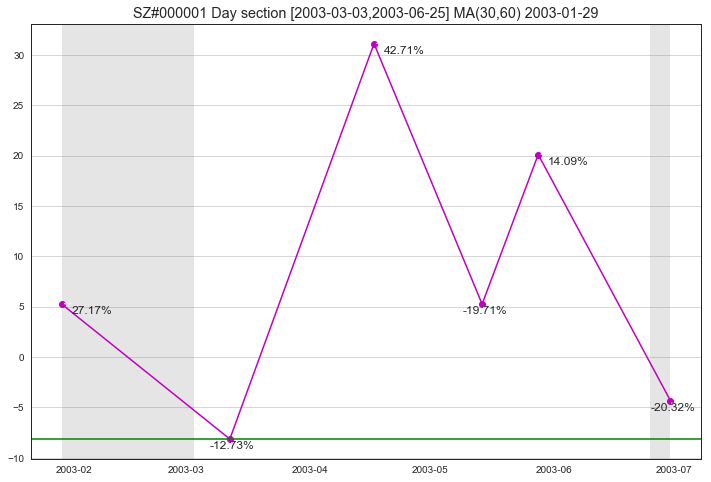

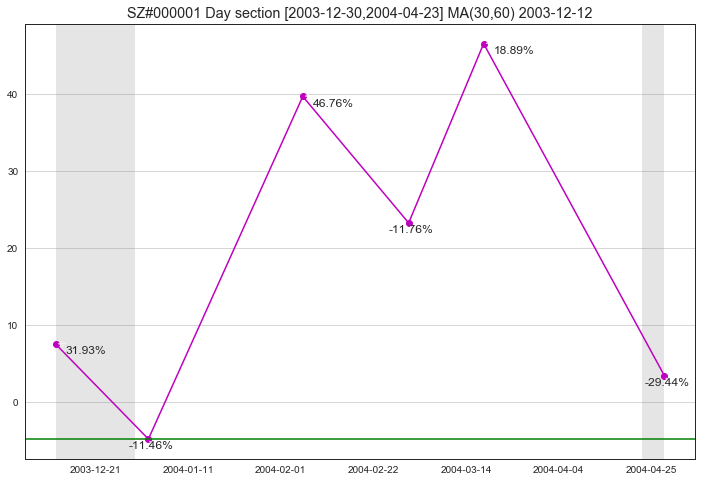

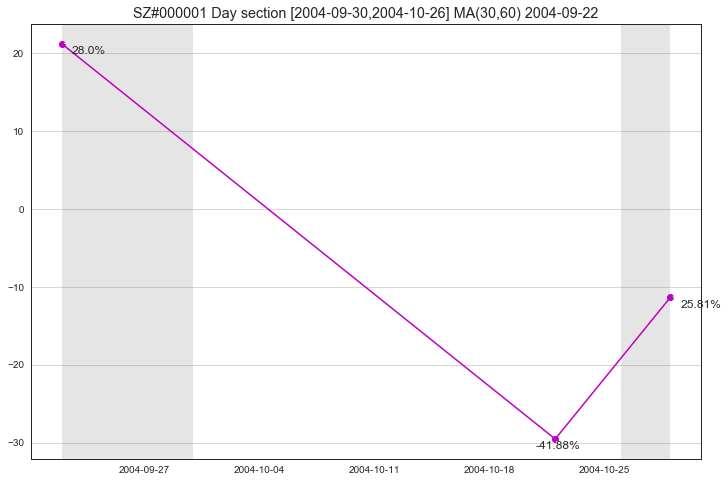

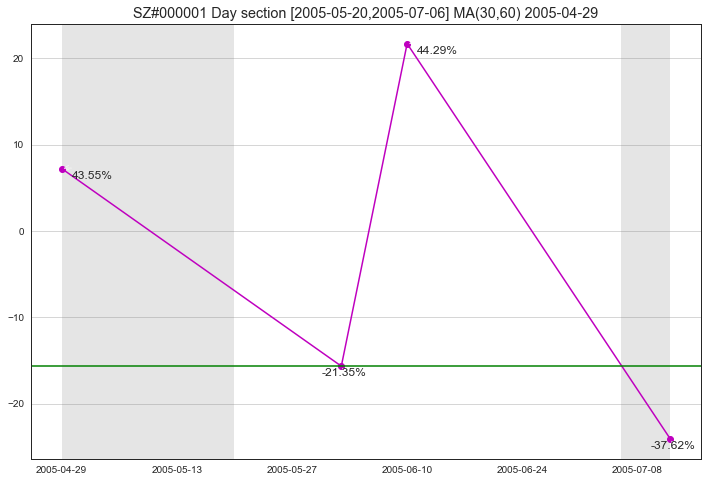

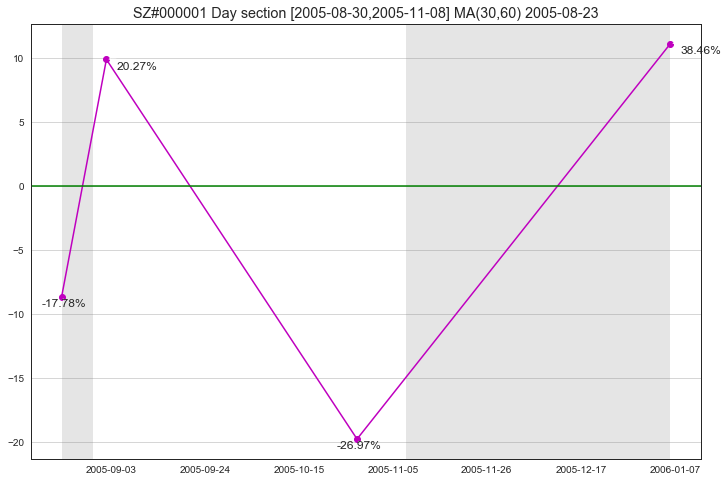

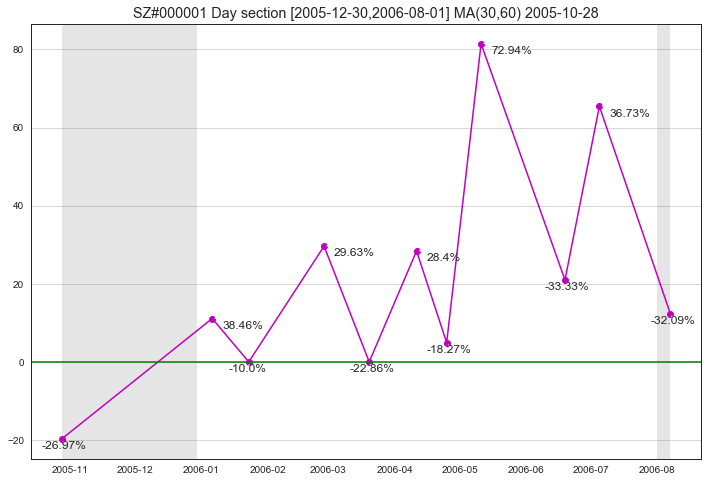

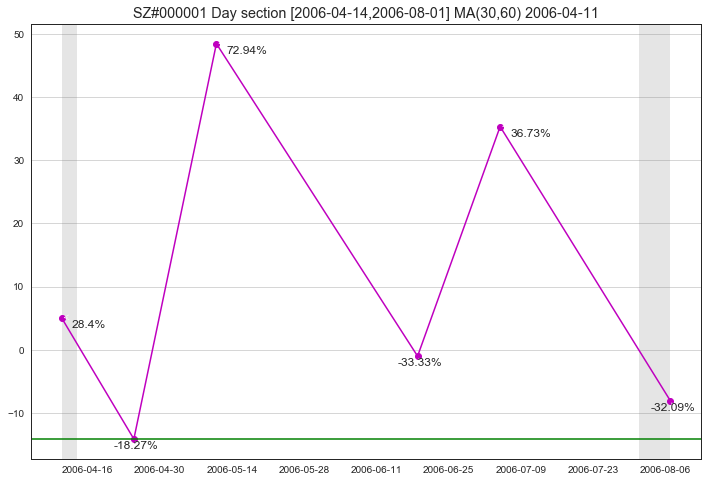

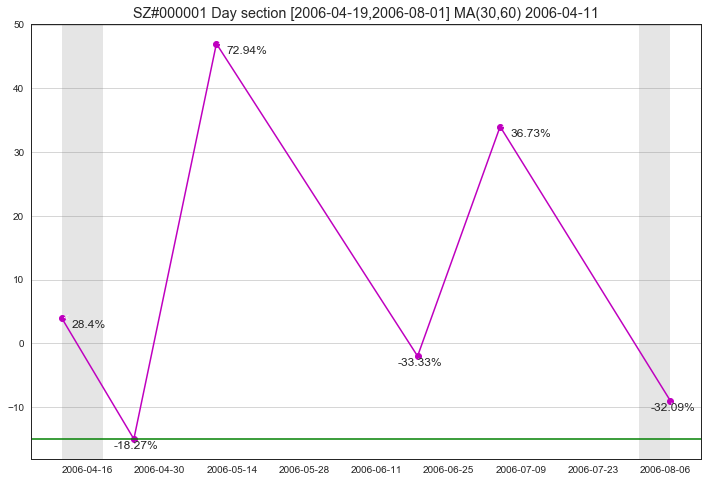

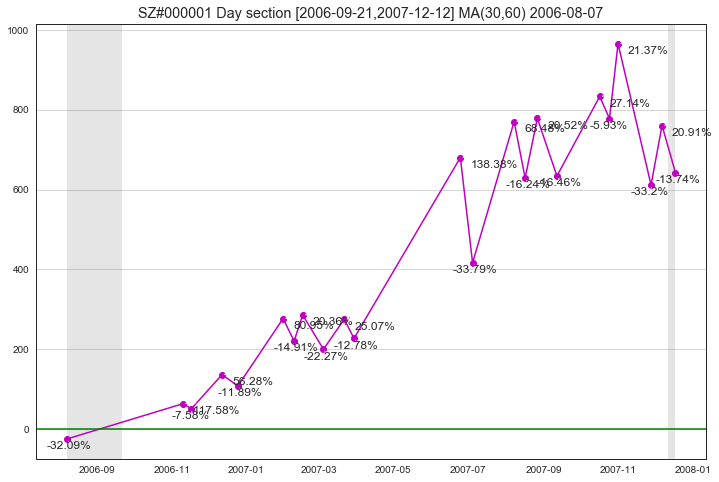

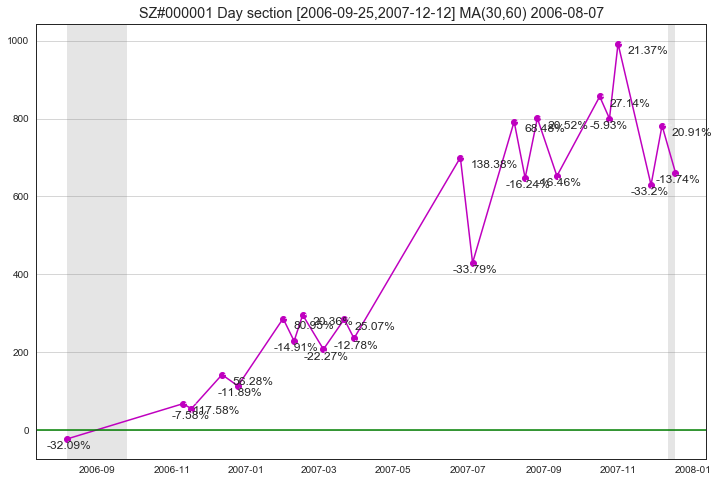

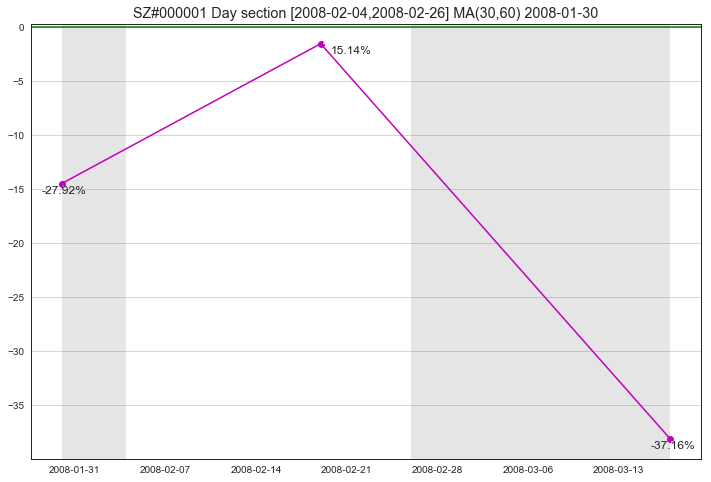

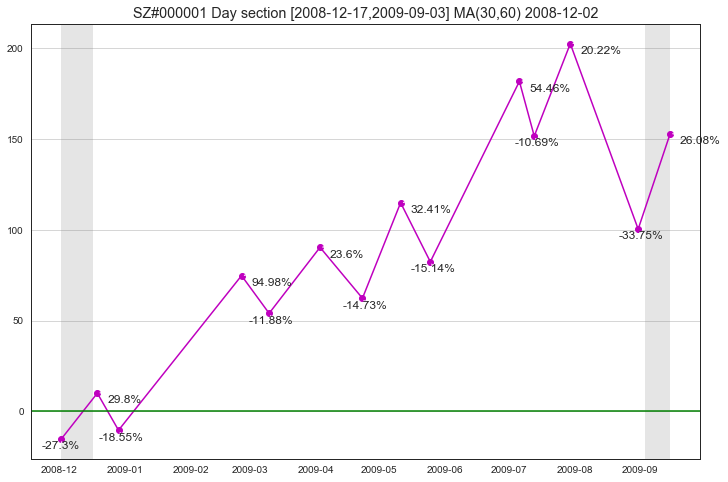

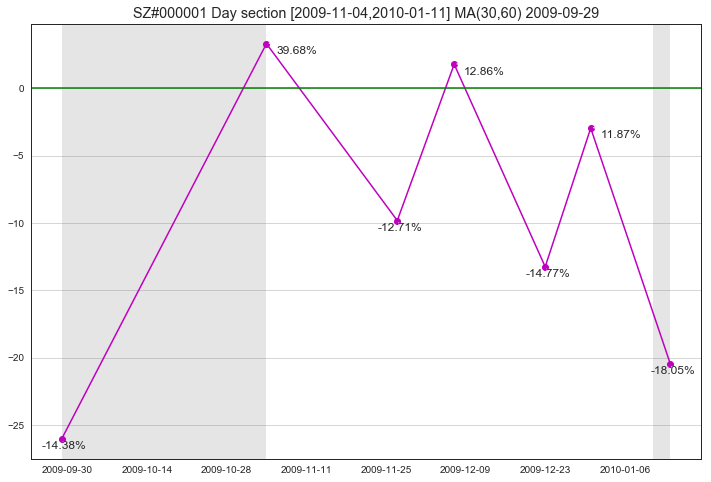

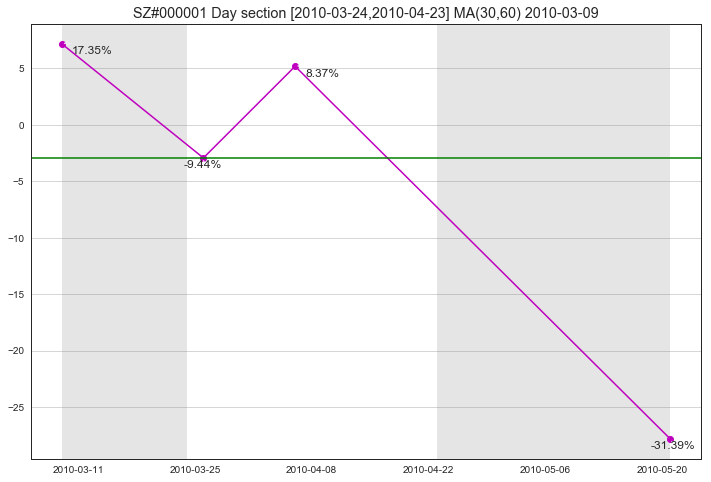

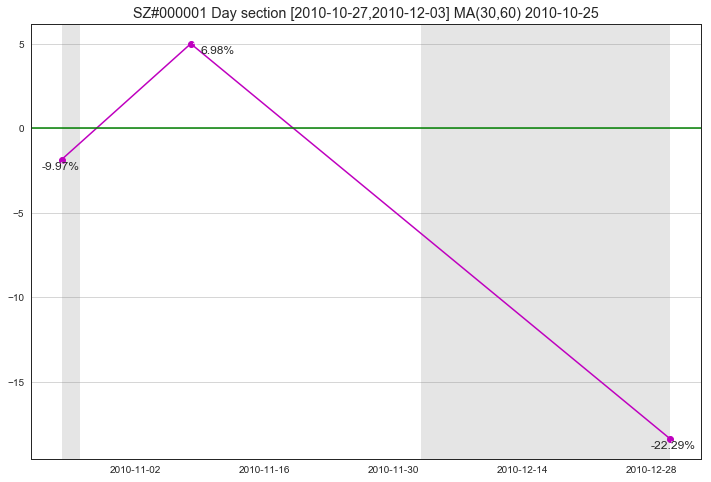

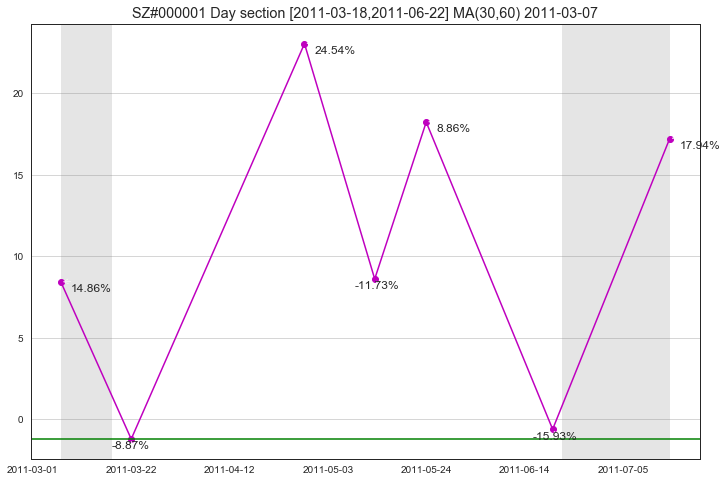

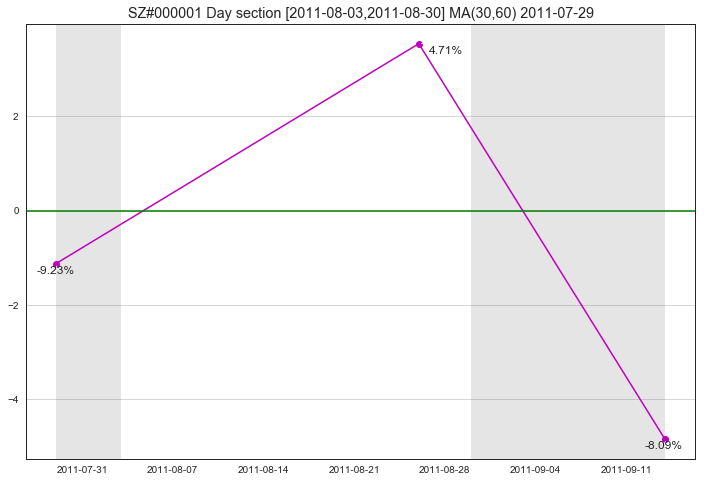

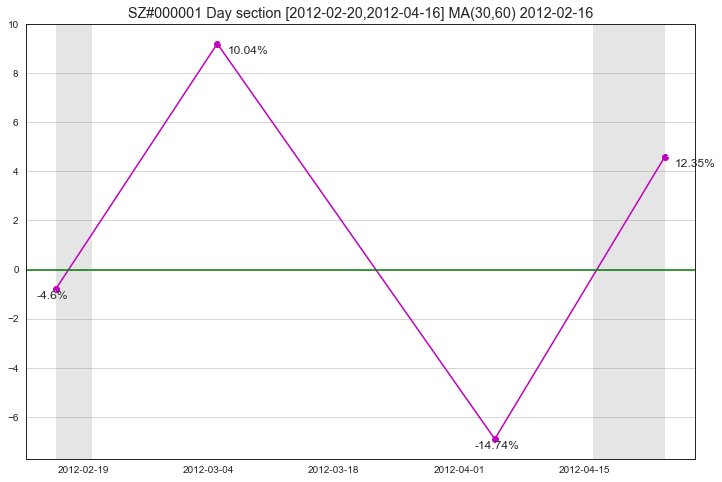

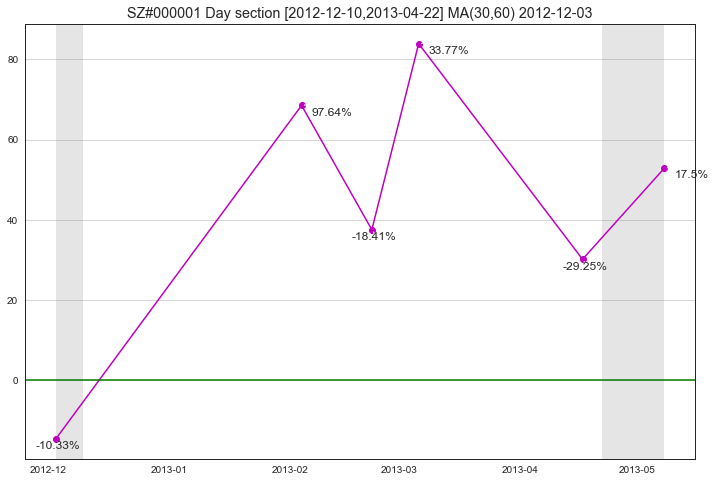

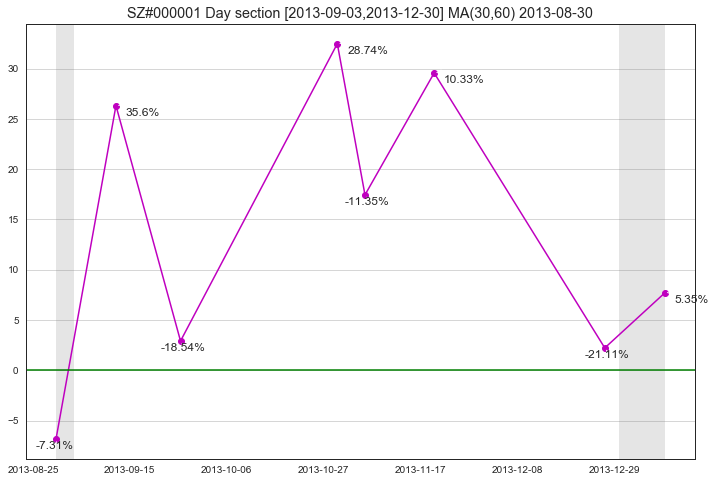

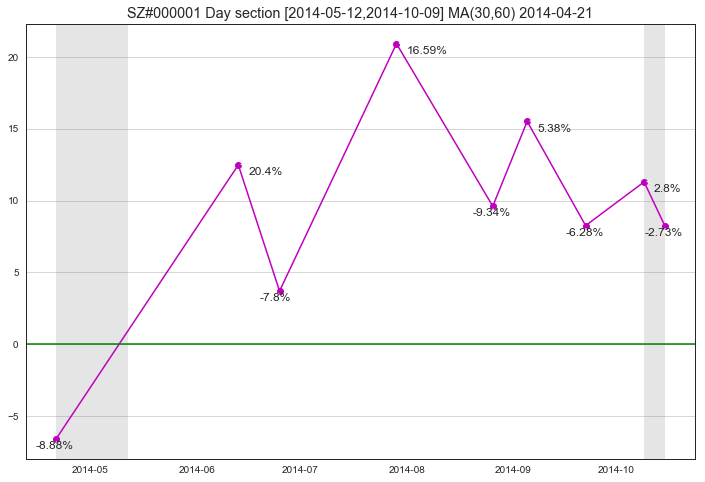

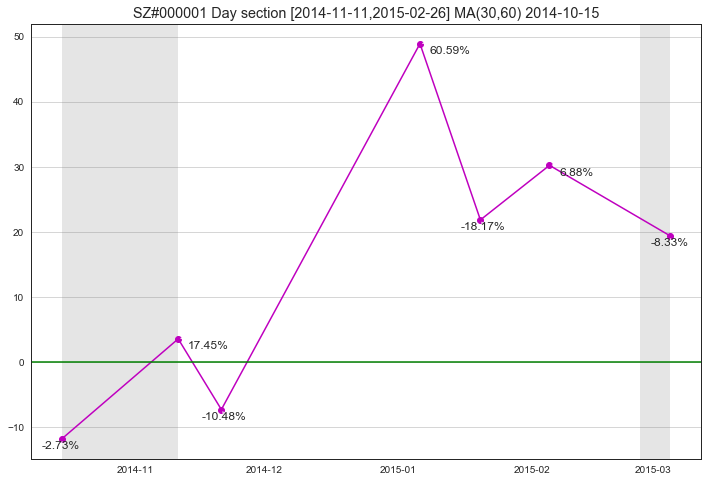

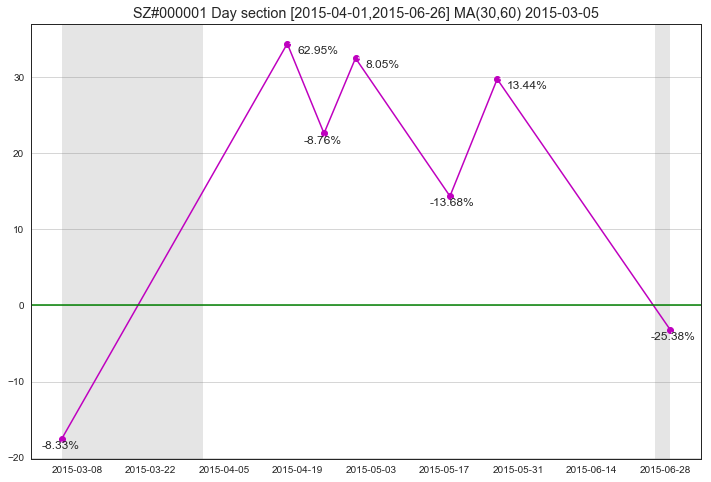

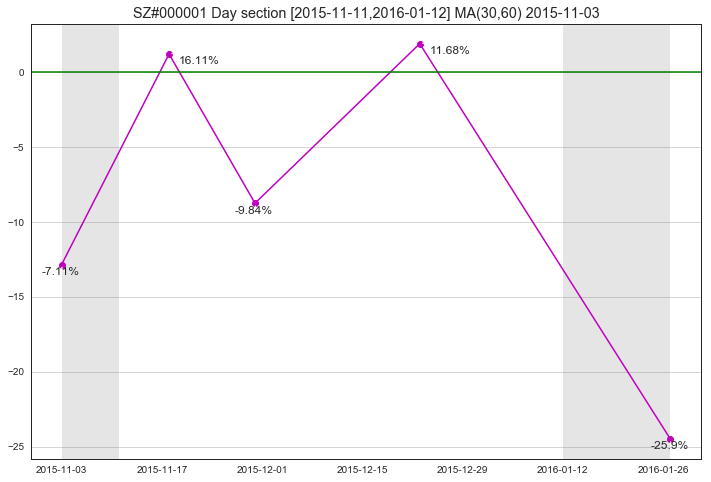

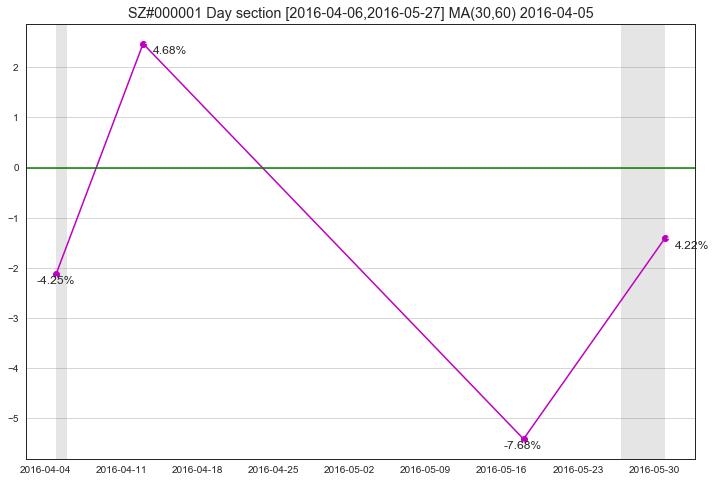

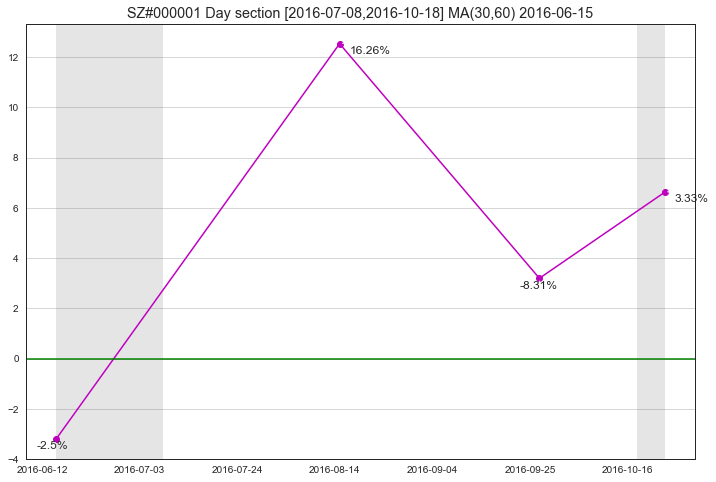

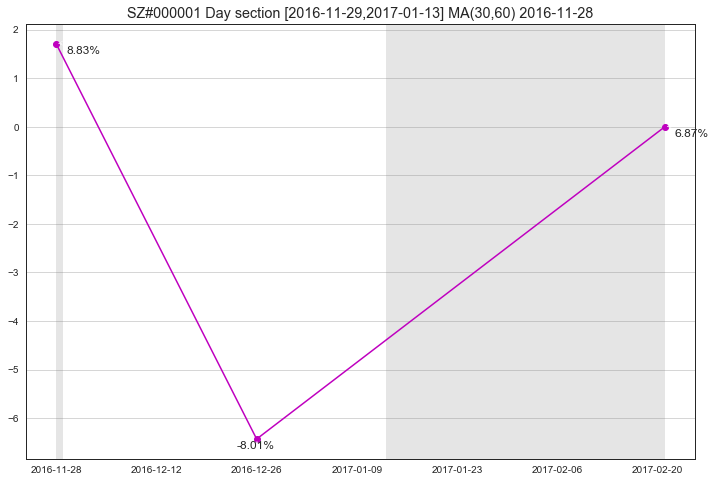

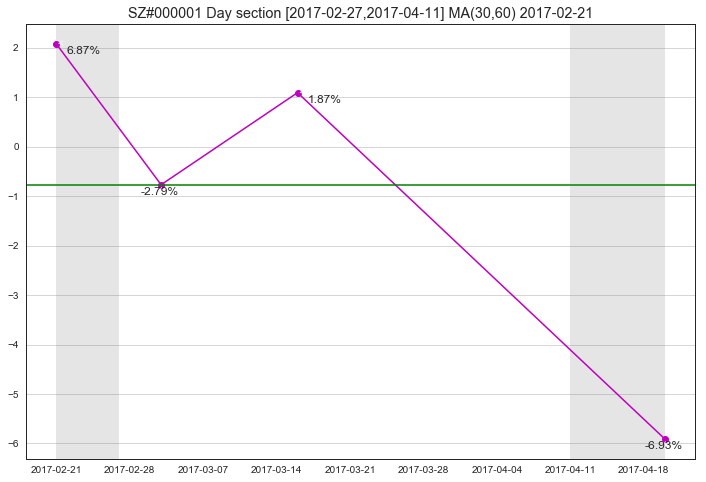

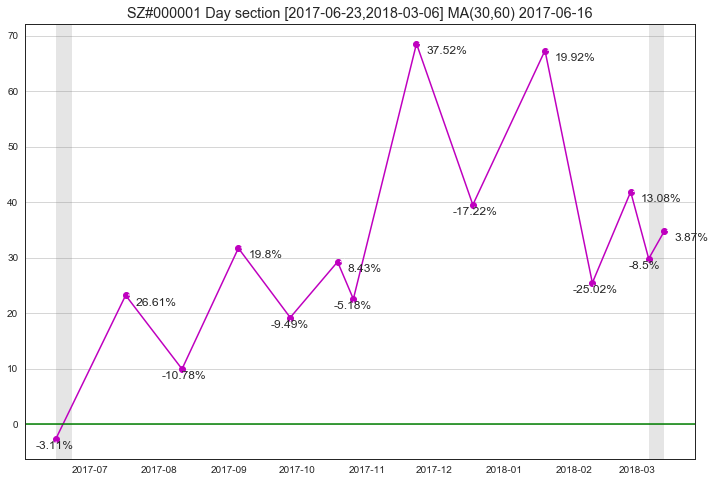

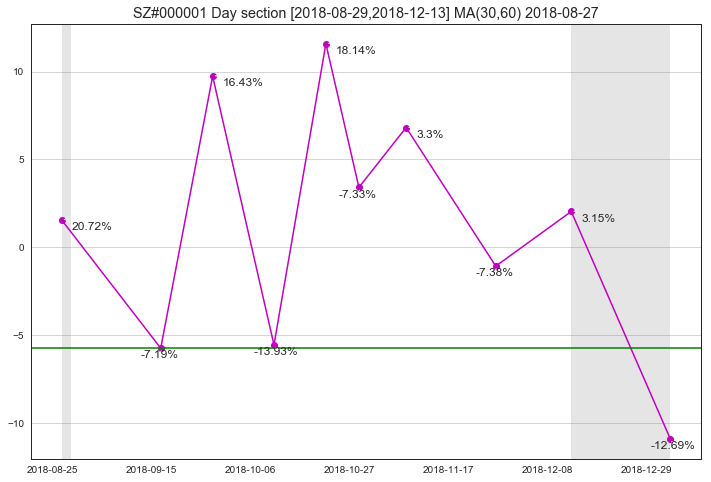

In [9]:
# 将每个波段的笔画出来

%run KPainter.ipynb
%run SectionManager.ipynb
%run Util.ipynb

short=30
mid=60

symbols = get_symbol_slices(0,1)
for symbol in symbols:
    sectionManager = SectionManager(symbol, level_day, short, mid)
    section_df = sectionManager.get_all_cross_sections()
    print('section_df shape ' + str(section_df.shape[0]))

    biInSectionService = BiInSectionService(symbol, level_day, short, mid)
    for key,row in section_df.iterrows():
        painter = KPainter(symbol, level_day, short, mid)
        painter.draw_single_level_chan_bi(row['s_date'],row['e_date'],row['s_price'],row['e_price'])

